In [39]:
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
from functions.multi_gradient_descent import *

In [40]:
def feature_scaling(data):
    k = np.zeros(data.shape[1])
    # for r in range(data.shape[0]):
    for c in range(data.shape[1]):
        k[c] = np.sum(data[:,c])
    k = k/data.shape[0]
    for c in range(data.shape[1]):
        f = np.max(data[:,c]) - np.min(data[:,c])
        data[:,c] -= k[c]
        data[:,c] /= f
    return data
        

In [41]:
file = "./data from book/advertising.csv"
data = pd.read_csv(file)
print(data.head())
x_data = np.array([[x,x**2] for x in data['TV']])
x_test = x_data[150:]
x_data = x_data[0:150]

y_data = np.array(data['sales'])
y_test = y_data[150:]
y_data = y_data[0:150]


   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [42]:
# # fetaure scaling
# x_data = feature_scaling(x_data)
# y_data = feature_scaling(y_data)

In [43]:
w = np.zeros(x_data.shape[1])
b=0
per_w,per_b = gradient_descent(x_data,y_data,w,b,0.00000000006,50)
print(per_w, per_b)

[1.43474344e-07 2.97251504e-05] 8.490400000000004e-10 -------------------------------- j:  99.75775748677475 dj_dw:  [  -2391.23906667 -495419.17333333] dj_db:  -14.150666666666673
[1.10857882e-06 2.17786150e-04] 7.193336199119409e-09 -------------------------------- j:  39.67532799335506 dj_dw:  [  -1134.02453928 -203118.29113443] dj_db:  -8.405587586954791
[1.59644427e-06 2.94889660e-04] 1.135679808570629e-08 -------------------------------- j:  29.575727039487646 dj_dw:  [  -618.573814  -83276.6458242] dj_db:  -6.050136750449189
[1.88864444e-06 3.26501249e-04] 1.4626129420658246e-08 -------------------------------- j:  27.877998895605778 dj_dw:  [  -407.24189194 -34142.27495775] dj_db:  -5.084413589764533
[2.10062290e-06 3.39461419e-04] 1.752887119042058e-08 -------------------------------- j:  27.59258511608792 dj_dw:  [  -320.59689341 -13997.47142016] dj_db:  -4.688470615688185
[2.26260647e-06 3.44430322e-04] 2.000974405137419e-08


In [44]:
pred = predict_graph(x_data,per_w,per_b)


In [45]:
pred

array([1.82367319e+01, 6.82158852e-01, 1.01935203e-01, 7.90579367e+00,
       1.12593679e+01, 2.60896358e-02, 1.13890287e+00, 4.97661506e+00,
       2.54935451e-02, 1.37501243e+01, 1.50503799e+00, 1.58773769e+01,
       1.95152982e-01, 3.27446138e+00, 1.43483303e+01, 1.31511914e+01,
       1.58344451e+00, 2.72746824e+01, 1.64950941e+00, 7.47353789e+00,
       1.64293246e+01, 1.94122030e+01, 6.00434258e-02, 1.79525315e+01,
       1.33697495e+00, 2.38063822e+01, 7.03373174e+00, 1.98562659e+01,
       2.13212959e+01, 1.71692448e+00, 2.95494813e+01, 4.39050557e+00,
       3.25434252e+00, 2.42978732e+01, 3.15467821e+00, 2.91072553e+01,
       2.45363080e+01, 1.92212123e+00, 6.39914749e-01, 1.79053818e+01,
       1.41242541e+01, 1.07910581e+01, 2.96908888e+01, 1.47447071e+01,
       2.17051359e-01, 1.05606333e+01, 2.77152035e+00, 1.98232002e+01,
       1.77799522e+01, 1.54168718e+00, 1.37501243e+01, 3.47213994e+00,
       1.61298034e+01, 1.14846707e+01, 2.37701753e+01, 1.36265304e+01,
      

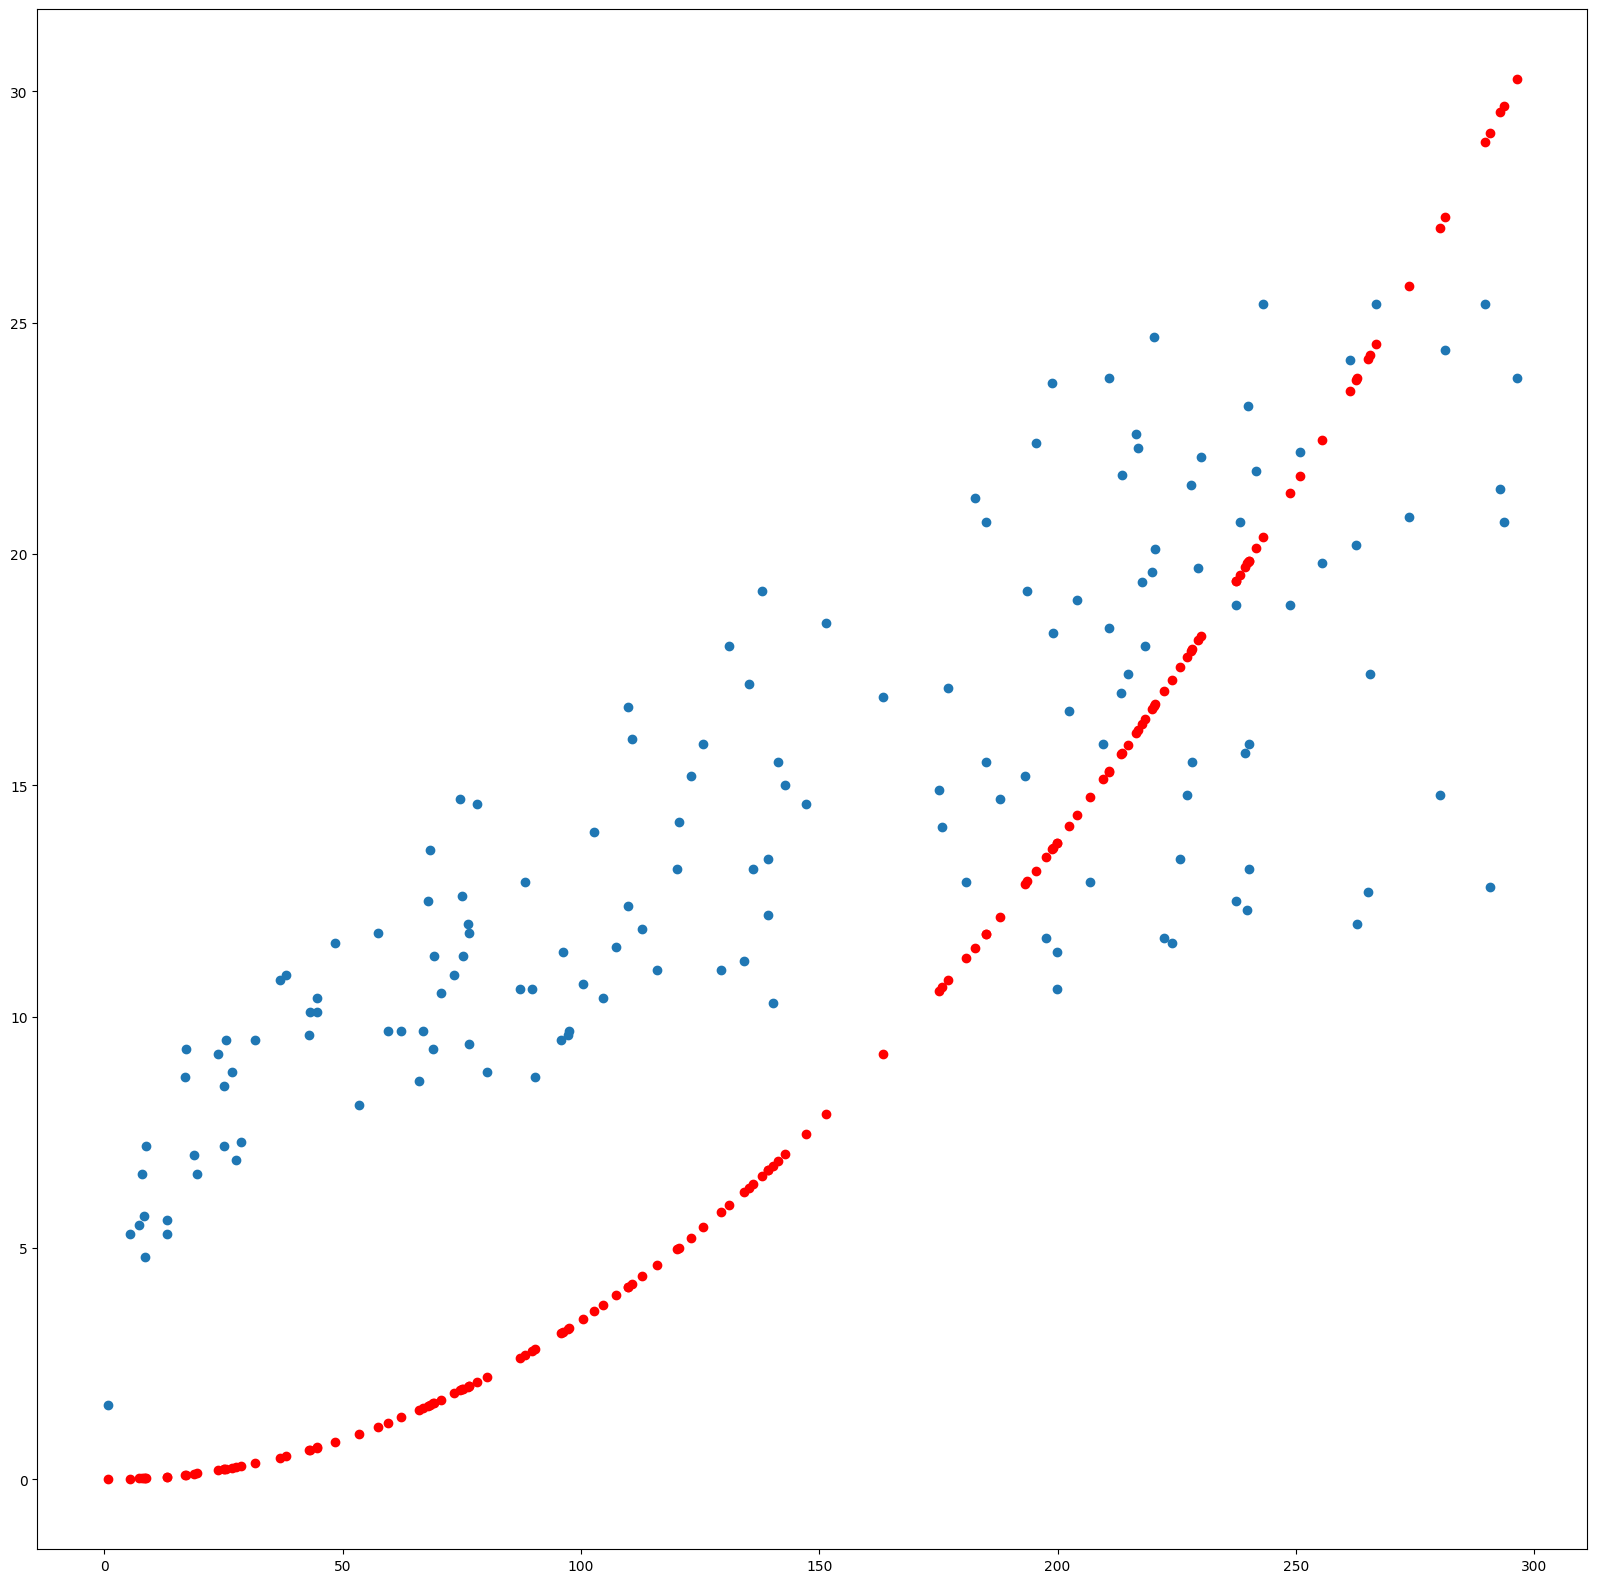

In [46]:
pl.figure(figsize=[20,20])
pl.scatter(x_data[:,0],y_data)
pl.scatter(x_data[:,0],pred,color= "red")
pl.show()

In [47]:
print(accuracy(x_test, y_test,per_w,per_b))

51.816727061141066
